Lab1

In [ ]:
import numpy
speed_of_cars = [10,20,30,40,50,60,70,80,90,30,40,50,60]
x= numpy.mean(speed_of_cars)
print("Mean:",x)
y = numpy.median(speed_of_cars)
print("Median:",y)
from scipy import stats
z= stats.mode(speed_of_cars)
print(f"Mode number: {int(z.mode)} and Frequency: {int(z.count)}")

Mean: 48.46153846153846
Median: 50.0
Mode number: 30 and Frequency: 2


<ipython-input-9-45bb1e17fe25>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[['Math', 'Science', 'English']].mean().reset_index(), x='index', y=0, palette="viridis")


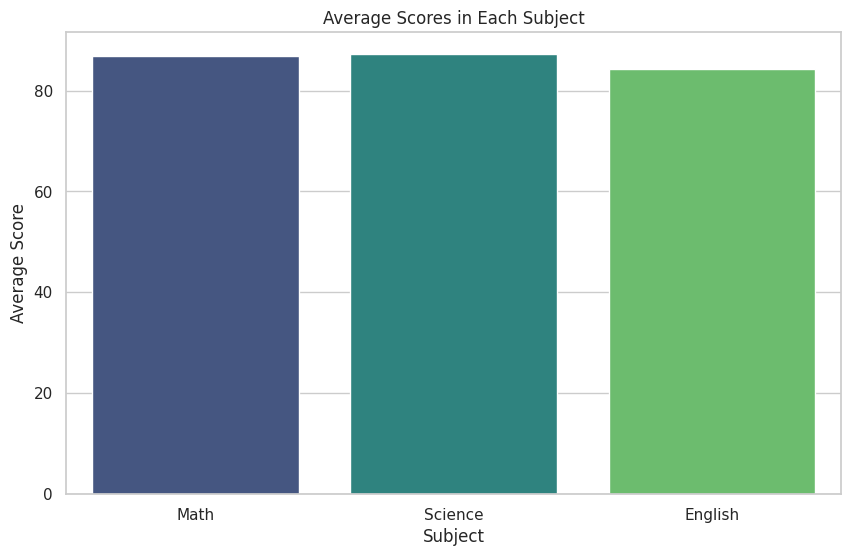

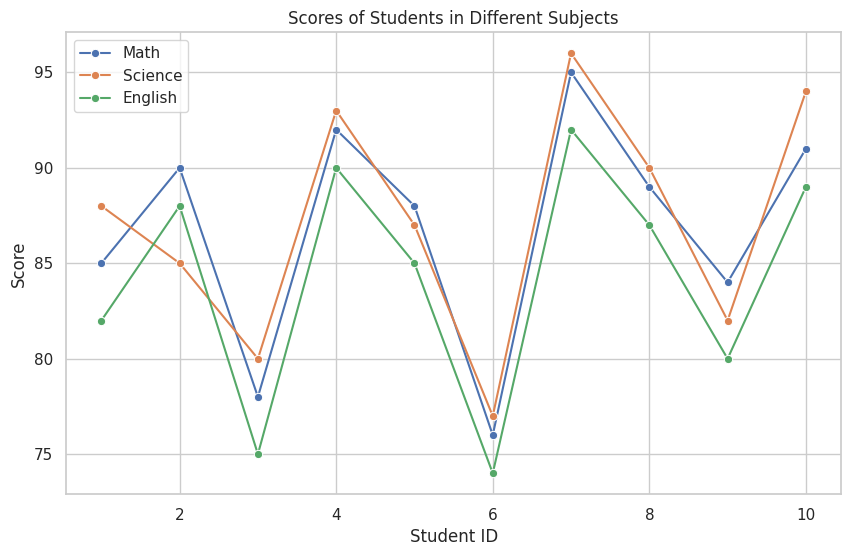

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataset: Students' scores in Math, Science, and English
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Math': [85, 90, 78, 92, 88, 76, 95, 89, 84, 91],
    'Science': [88, 85, 80, 93, 87, 77, 96, 90, 82, 94],
    'English': [82, 88, 75, 90, 85, 74, 92, 87, 80, 89]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 1: Bar plot of average scores in each subject
plt.figure(figsize=(10, 6))
sns.barplot(data=df[['Math', 'Science', 'English']].mean().reset_index(), x='index', y=0, palette="viridis")
plt.title('Average Scores in Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

# Plot 2: Line plot of scores for each student
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Student_ID', y='Math', label='Math', marker='o')
sns.lineplot(data=df, x='Student_ID', y='Science', label='Science', marker='o')
sns.lineplot(data=df, x='Student_ID', y='English', label='English', marker='o')
plt.title('Scores of Students in Different Subjects')
plt.xlabel('Student ID')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import zscore

# Load the dataset from CSV
df = pd.read_csv('/content/samledata1.csv')

# 1. Discretization: Convert continuous 'Income' into bins
print("\n1. Discretization: Convert 'Income' into bins")
df['Income_Bins'] = pd.cut(df['Income'], bins=3, labels=["Low", "Medium", "High"])
print(df[['Income', 'Income_Bins']].head())

# 2. Sampling: Randomly sample 5 rows from the dataset
print("\n2. Sampling: Randomly sample 5 rows")
sampled_df = df.sample(n=5, random_state=42)
print(sampled_df)

# 3. Remove Duplicates: Remove duplicate rows
print("\n3. Remove Duplicates")
df_no_duplicates = df.drop_duplicates()
print(f"Original shape: {df.shape}, After removing duplicates: {df_no_duplicates.shape}")

# 4. Handle Outliers: Remove rows with outliers in 'Score' using Z-score
print("\n4. Handle Outliers in 'Score' using Z-score")
df['Score_Zscore'] = zscore(df['Score'])
df_no_outliers = df[(df['Score_Zscore'].abs() <= 3)]  # Keep rows with Z-score <= 3
print(f"Original shape: {df.shape}, After removing outliers: {df_no_outliers.shape}")

# 5. Handle Missing Values: Fill missing values in 'Income' with the mean
print("\n5. Handle Missing Values: Fill missing 'Income' with mean")
df['Income'] = df['Income'].fillna(df['Income'].mean())
print(df.head())

# 6. Noise Handling: Smooth 'Score' using a rolling mean
print("\n6. Noise Handling: Smooth 'Score' using rolling mean")
df['Score_Smooth'] = df['Score'].rolling(window=3, min_periods=1).mean()
print(df[['Score', 'Score_Smooth']].head())

# Save the preprocessed dataset to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed dataset saved to 'preprocessed_data.csv'")

FileNotFoundError: [Errno 2] No such file or directory: '/content/samledata1.csv'

Lab 3 starts here

The Decision Tree model has given Accuracy of: 50.000%


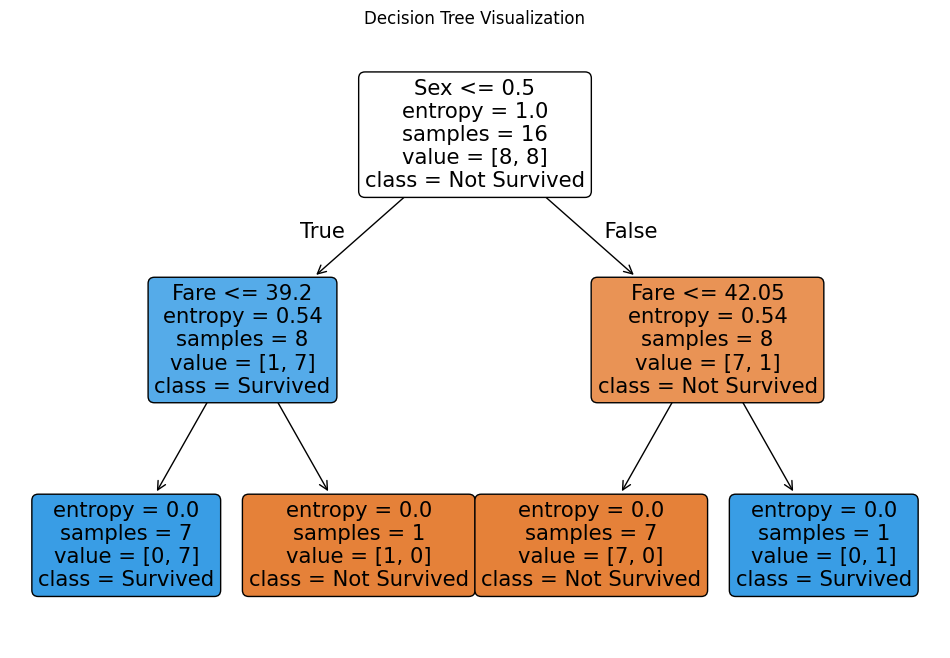

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the Excel file
file_path = "/content/titanic_dataset.csv"
data = pd.read_csv(file_path)

# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # Convert 'male'/'female' to 0/1

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values  # Features
y = data['Survived'].values  # Target

# Handle missing values (if any)
data.dropna(inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier with specific parameters
algo = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4, min_samples_leaf=1)
algo.fit(X_train, y_train)

# Model accuracy
result = algo.score(X_test, y_test)
print("The Decision Tree model has given Accuracy of: %.3f%%" % (result * 100.0))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(algo, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
               class_names=['Not Survived', 'Survived'], rounded=True, precision=2)
plt.title("Decision Tree Visualization")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the Excel file
file_path = "/content/titanic_dataset.csv"
data = pd.read_csv(file_path)

# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # Convert 'male'/'female' to 0/1

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values  # Features
y = data['Survived'].values  # Target

# Handle missing values (if any)
data.dropna(inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation: Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
file_path = "/content/titanic_dataset.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
# Encoding categorical data 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Handle missing values (if any)
data = data.dropna(subset=['Age', 'Fare'])  # You can adjust based on the dataset

# Features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Features
y = data['Survived']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')  # You can try 'rbf' or other kernels

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluation: Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Mean Squared Error (MSE): 0.05833475607579544
R-squared: 0.7666609756968182


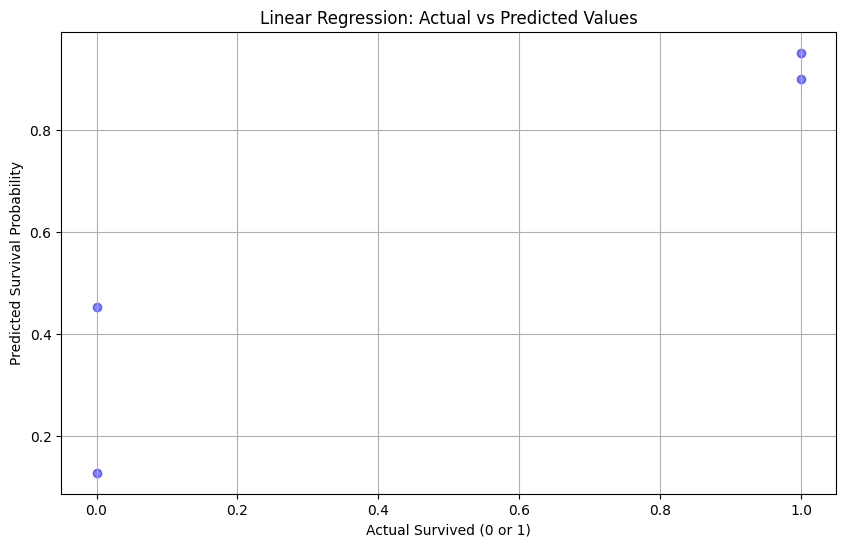

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/titanic_dataset.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
# Encoding categorical data 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Handle missing values (if any)
data = data.dropna(subset=['Age', 'Fare'])  # You can adjust based on the dataset

# Features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Features
y = data['Survived']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluation: Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Adding labels and title
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Survived (0 or 1)')
plt.ylabel('Predicted Survival Probability')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/titanic_dataset.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
# Encoding categorical variable 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Handling missing values (if any)
data = data.dropna(subset=['Age', 'Fare'])

# Features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Features
y = data['Survived']  # Target variable

# Standardizing features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementing K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Logistic Regression Model
model = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.4f}")
print(f"Standard deviation: {np.std(scores):.4f}")


Cross-validation scores: [1.   0.75 0.5  1.   0.75]
Mean accuracy: 0.8000
Standard deviation: 0.1871


Lab4 Clustering


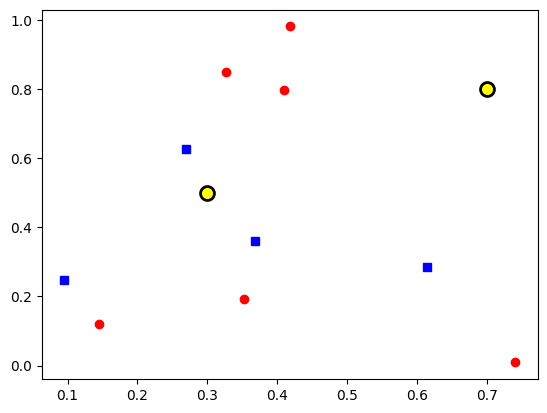

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.rand(10, 2)  # 10 points with 2 features (X, Y)
labels = np.random.randint(0, 2, size=10)  # Assign random labels (0 or 1)
colors = {0: "red", 1: "blue"}  # Color mapping
markers = {0: "o", 1: "s"}  # Marker mapping
centers = np.array([[0.3, 0.5], [0.7, 0.8]])  # Example cluster centers

# Plot each data point
for i in range(len(data)):
    plt.plot(data[i, 0], data[i, 1], color=colors[labels[i]], marker=markers[labels[i]], linestyle='')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker="o", s=100, linewidths=2, edgecolors="black", color="yellow")

# Show the final plot
plt.show()


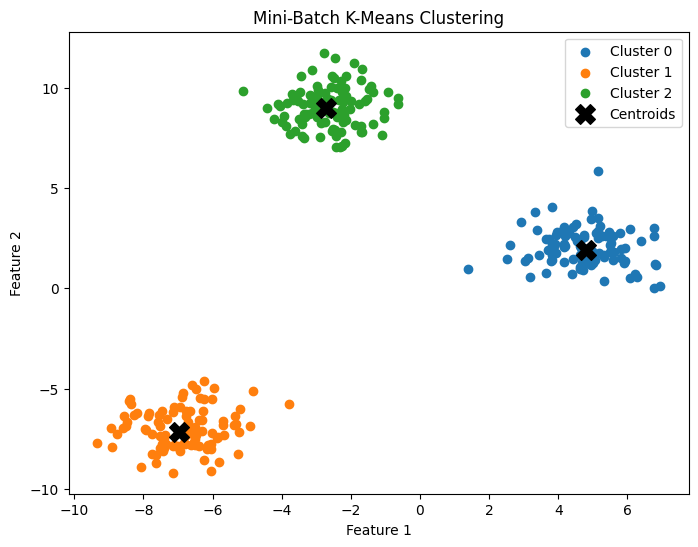

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Mini-Batch K-Means Clustering
n_clusters = 3
mini_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=20, random_state=42)
mini_kmeans.fit(X)

# Cluster centers and labels
centers = mini_kmeans.cluster_centers_
labels = mini_kmeans.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i}")

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200, color="black", label="Centroids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Mini-Batch K-Means Clustering")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Medoids Clustering
n_clusters = 3
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, method='pam')
kmedoids.fit(X)

# Cluster centers (medoids) and labels
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i}")

# Plot medoid centers
plt.scatter(medoids[:, 0], medoids[:, 1], marker="X", s=200, color="black", label="Medoids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

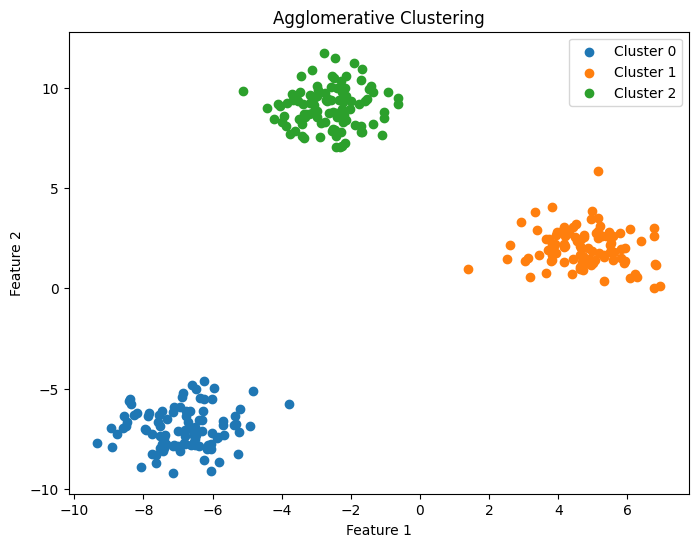

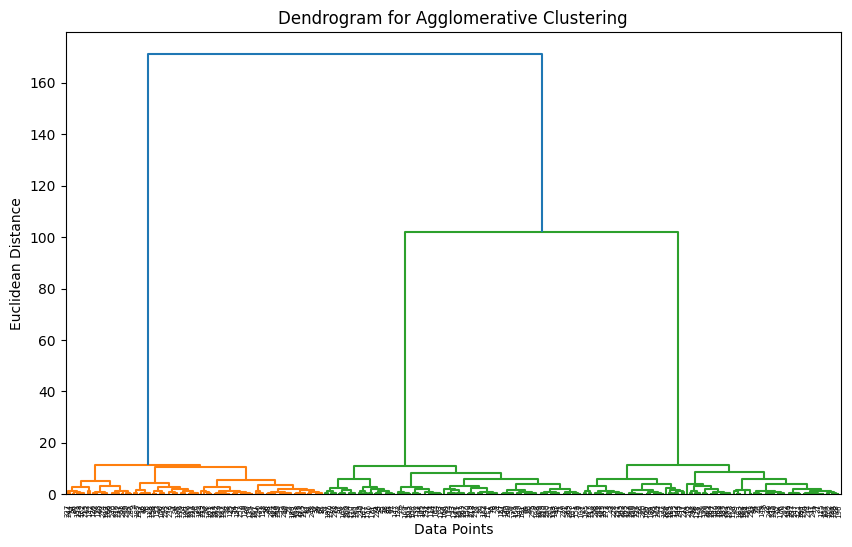

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_clustering.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

# Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


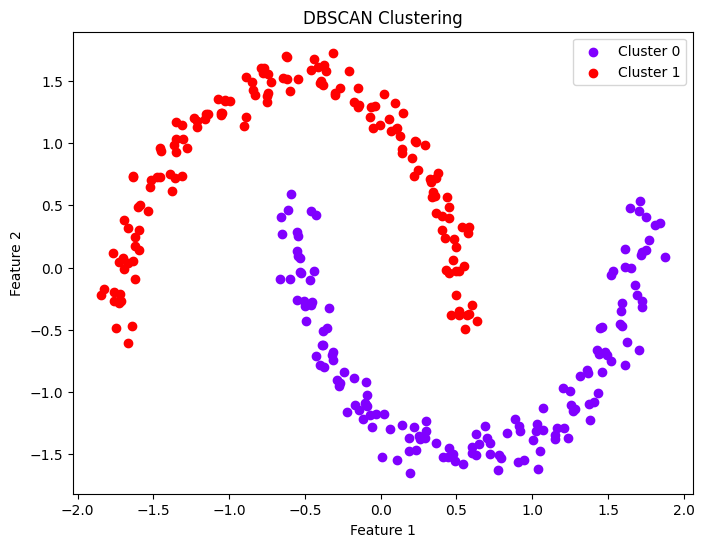

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (non-linearly separable)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the features (recommended for DBSCAN)
X = StandardScaler().fit_transform(X)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps: neighborhood radius, min_samples: min points in a cluster
labels = dbscan.fit_predict(X)

# Identify unique clusters and noise points (-1 label represents noise)
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the clustered data
plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    cluster_points = X[labels == label]
    if label == -1:  # Noise points
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='black', marker='x', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f"Cluster {label}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


Lab2


In [ ]:


import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a sample dataset to simulate transactions
data = [
    ['Messi', 'Ronaldo', 'Maradona'],
    ['Pele', 'Zidane', 'Ronaldinho'],
    ['Messi', 'Ronaldo'],
    ['Ronaldo', 'Maradona'],
    ['Messi', 'Ronaldo', 'Pele', 'Zidane'],
    ['Maradona', 'Ronaldinho'],
    ['Pele', 'Cruyff'],
    ['Messi', 'Pele'],
    ['Ronaldo', 'Zidane']
]

# Convert the list of transactions into a DataFrame
data_frame = pd.DataFrame(data)

# One-hot encode the transactions
basket = data_frame.stack().reset_index().rename(columns={0: 'item', 'level_0': 'transaction'})
basket['value'] = 1
basket = basket.pivot_table(index='transaction', columns='item', values='value', fill_value=0)

# Display the basket representation
print("Basket Representation:")
print(basket.head(), "\n")

# Apply the FP-Growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(basket, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets, "\n")

# Generate association rules from frequent itemsets
num_transactions = basket.shape[0]  # Get the number of transactions
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_transactions)
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']], "\n")


Basket Representation:
item         Cruyff  Maradona  Messi  Pele  Ronaldinho  Ronaldo  Zidane
transaction                                                            
0               0.0       1.0    1.0   0.0         0.0      1.0     0.0
1               0.0       0.0    0.0   1.0         1.0      0.0     1.0
2               0.0       0.0    1.0   0.0         0.0      1.0     0.0
3               0.0       1.0    0.0   0.0         0.0      1.0     0.0
4               0.0       0.0    1.0   1.0         0.0      1.0     1.0 

Frequent Itemsets:
     support             itemsets
0   0.555556            (Ronaldo)
1   0.444444              (Messi)
2   0.333333           (Maradona)
3   0.444444               (Pele)
4   0.333333             (Zidane)
5   0.222222         (Ronaldinho)
6   0.333333     (Ronaldo, Messi)
7   0.222222        (Pele, Messi)
8   0.222222  (Ronaldo, Maradona)
9   0.222222       (Pele, Zidane)
10  0.222222    (Ronaldo, Zidane) 

Association Rules:
  antecedents consequen

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Define the dataset (Messi appears frequently)
data = [
    ['Messi', 'Ronaldo', 'Maradona'],
    ['Messi', 'Zidane', 'Ronaldinho'],
    ['Messi', 'Ronaldo', 'Pele'],
    ['Messi', 'Ronaldo', 'Zidane'],
    ['Messi', 'Ronaldo', 'Pele', 'Zidane'],
    ['Messi', 'Ronaldinho', 'Maradona'],
    ['Messi', 'Pele', 'Cruyff'],
    ['Messi', 'Pele'],
    ['Messi', 'Ronaldo', 'Zidane'],
    ['Messi', 'Beckenbauer', 'Maldini'],
    ['Messi', 'Xavi', 'Iniesta'],
    ['Messi', 'Neymar', 'Suarez'],
    ['Messi', 'Cristiano Ronaldo', 'Benzema'],
    ['Messi', 'Kaka', 'Rivaldo'],
    ['Messi', 'Henry', 'Bergkamp'],
    ['Messi', 'Mbappe', 'Haaland'],
    ['Messi', 'Gerrard', 'Lampard'],
    ['Messi', 'Lewandowski', 'Muller'],
    ['Messi', 'Ronaldo', 'Mbappe'],
    ['Messi', 'Pele', 'Garrincha'],
    ['Messi', 'Zidane', 'Figo'],
    ['Messi', 'Cantona', 'Giggs'],
    ['Messi', 'Rivaldo', 'Ronaldinho'],
    ['Messi', 'Maldini', 'Nesta'],
    ['Messi', 'Buffon', 'Casillas'],
    ['Messi', 'Del Piero', 'Totti'],
    ['Messi', 'Van Basten', 'Gullit'],
    ['Messi', 'Xavi', 'Iniesta'],
    ['Messi', 'Cristiano Ronaldo', 'Rooney'],
    ['Messi', 'Modric', 'Kroos'],
    ['Messi', 'Ronaldo', 'Neymar'],
    ['Messi', 'Hazard', 'De Bruyne'],
    ['Messi', 'Baggio', 'Maldini'],
    ['Messi', 'Shevchenko', 'Kaka'],
    ['Messi', 'Salah', 'Mane'],
    ['Messi', 'Mbappe', 'Haaland'],
    ['Messi', 'Henry', 'Zidane'],
    ['Messi', 'Bale', 'Benzema'],
    ['Messi', 'Aguero', 'Di Maria'],
    ['Messi', 'Pele', 'Maradona', 'Cruyff']
]

# Convert dataset to a format suitable for Apriori
te = TransactionEncoder()
te_data = te.fit_transform(data)
df = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori algorithm to find frequent item sets
frequent_item_sets = apriori(df, min_support=0.3, use_colnames=True)

# Display the frequent item sets
print("Frequent Item Sets:")
print(frequent_item_sets)

# Generate association rules
rules = association_rules(frequent_item_sets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
print(rules)


Frequent Item Sets:
   support itemsets
0      1.0  (Messi)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'